# Lab 5: A 2-dimensional classification problem
In this session we will work with a set of data points in a 2-D plane. The task is to classify the points based on their coordinates and assign them to two different categories. The two categories are indicated with an integer with values 0 and 1. Each point on the plane belongs to a unique category.

The goal of the classification algorithm is to define a *prediction function* that predicts the category of a point based on its coordinates. The accuracy of our prediction is the ratio between the number of times we get the correct result and the total number of points.

In first part, we define the dataset and separate the categories in a simple way by drawing a straight line on the plane. 

In the second part we use a neural network with one layer to find a more accurate solution

### Import statements

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


### Helper functions
These two helper functions are used throughout the project. The input argument is a prediction function (*pred_func*). 
*pred_func* is a function that takes an array of points and returns an array of 0 and 1 based on the prediction. Examples are provided below.


In [2]:
# Helper function to plot a decision boundary.
# Input: pred_func. A function defined that operates on an array of points. 
#                   pred_func is expected to return an array of 0 and 1 
#                   for each point passed in the input array a 0 or 1 is returned based on the condition
#                   in the function

# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
    
# Helper function to calculate how often we get the prediction right
# This is the accuracy of our classification e.g. N_right/N_tot
def accuracy(pred_func):
    yhat=pred_func(X)
    return 1.-np.count_nonzero(yhat-y)/len(y) 



# Because the one above doesn't allow the use of separate generated data (Data not called X, y) for Ex.5, and I'm not rewriting the whole code
def plot_decision_boundary1(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


def accuracy1(pred_func, X, y):
    yhat=pred_func(X)
    return 1.-np.count_nonzero(yhat-y)/len(y) 

## Part 1: Prepare dataset and simple classification

### Dataset preparation
Data points are generated using the *generate_data* function below. 

In [3]:
# This cell contains the code to prepare the datasets
# It uses sklearn.make_moons that generate sets of data sets to train and test classification algorithms
import sklearn
import sklearn.datasets
import sklearn.linear_model

# Generate a dataset and plot it
#     Npoints is the number of points in the dataset
#     rndm is a random seed so different datasets can be generated
#     noise is a parameter controlling how much points are scattered
def generate_data(Npoints,rndm=0,noise=0.20):
    np.random.seed(rndm)
    X, y = sklearn.datasets.make_moons(Npoints, noise=noise)
    return X,y

X: [[ 3.02402326e-01  8.96238169e-01]
 [-3.85982755e-01  4.87309788e-01]
 [ 1.90209311e-01  1.13254278e-01]
 [ 1.71457157e+00 -1.10330489e-01]
 [ 1.96706272e+00 -5.15800798e-01]
 [ 1.37332758e+00  2.66143527e-01]
 [ 1.96645759e-01 -3.17949126e-01]
 [ 2.09079968e+00  3.50945301e-01]
 [-8.27802027e-01  1.31965020e+00]
 [-3.73989147e-01  1.14007928e+00]
 [-1.13332039e+00  4.08038818e-01]
 [ 5.72687378e-02  6.21768767e-01]
 [ 9.85266188e-01 -2.38709756e-01]
 [ 2.56600567e-01  2.87929677e-01]
 [-6.79219220e-01  7.36576149e-01]
 [ 9.17732485e-01 -5.51702973e-01]
 [ 1.89729198e+00  3.46152370e-01]
 [ 7.75991166e-01 -3.53296646e-01]
 [-4.43552426e-01  1.00554191e+00]
 [ 6.31697234e-01  7.81677632e-01]
 [-8.73459010e-01  3.91027380e-01]
 [ 1.02623894e+00 -5.86398923e-01]
 [-1.26041164e+00 -1.56035824e-01]
 [ 3.45432043e-01  9.46494453e-01]
 [ 8.16368558e-01  7.53291667e-01]
 [ 1.49280504e+00 -3.42003043e-01]
 [ 8.88128691e-01  2.80734803e-01]
 [ 8.97080578e-01 -5.52903711e-01]
 [ 3.39555735e-01

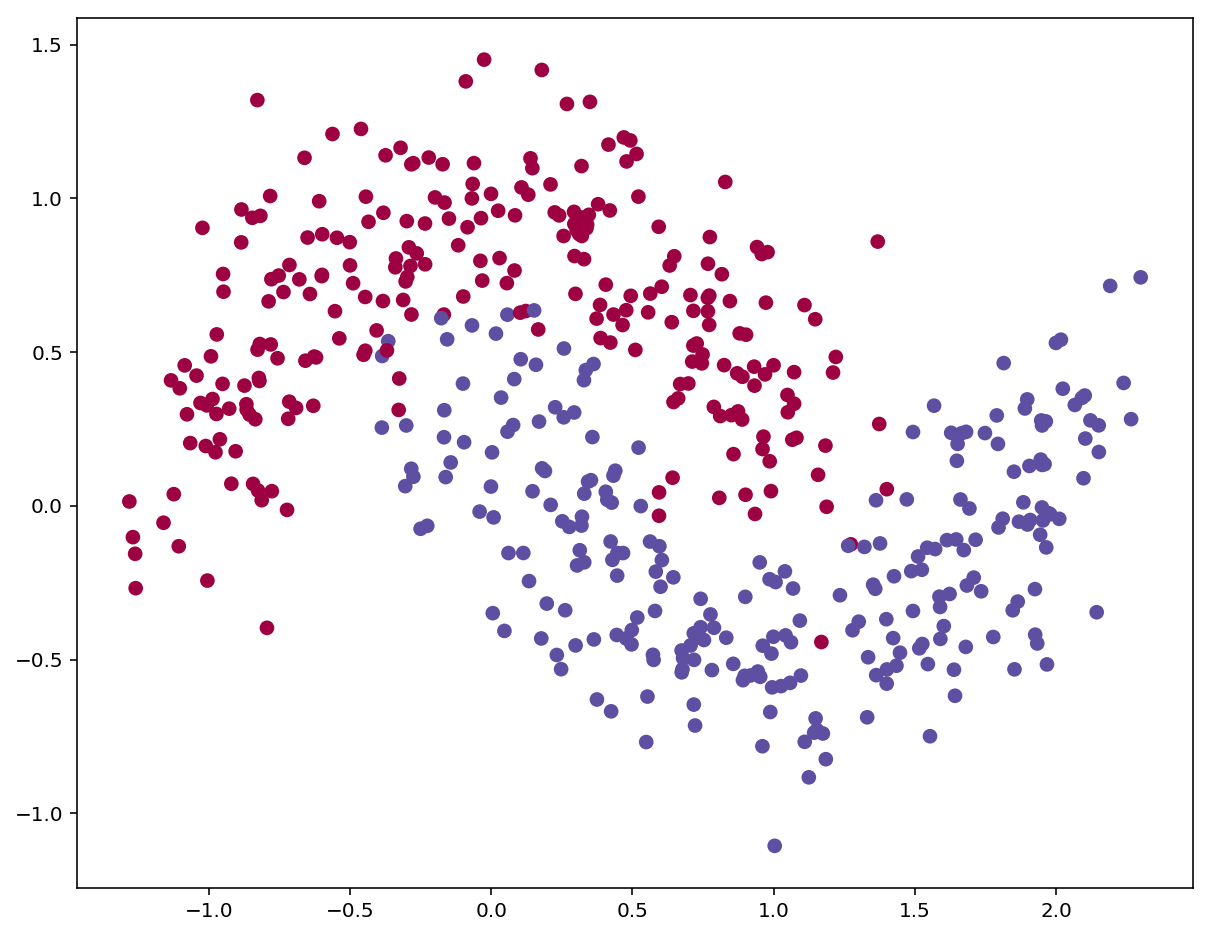

In [4]:
# Generate a dataset and plot it
X,y=generate_data(500)

print('X:', X)
print('y: ', y)
# Plot the data
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral) #1 is blue, 0 is red

# Print the data (first 10 elements)
print("X=",X[:10,:])
print("y=",y[:10])

### Making a prediction and plotting a boundary 


Accuracy= 0.796


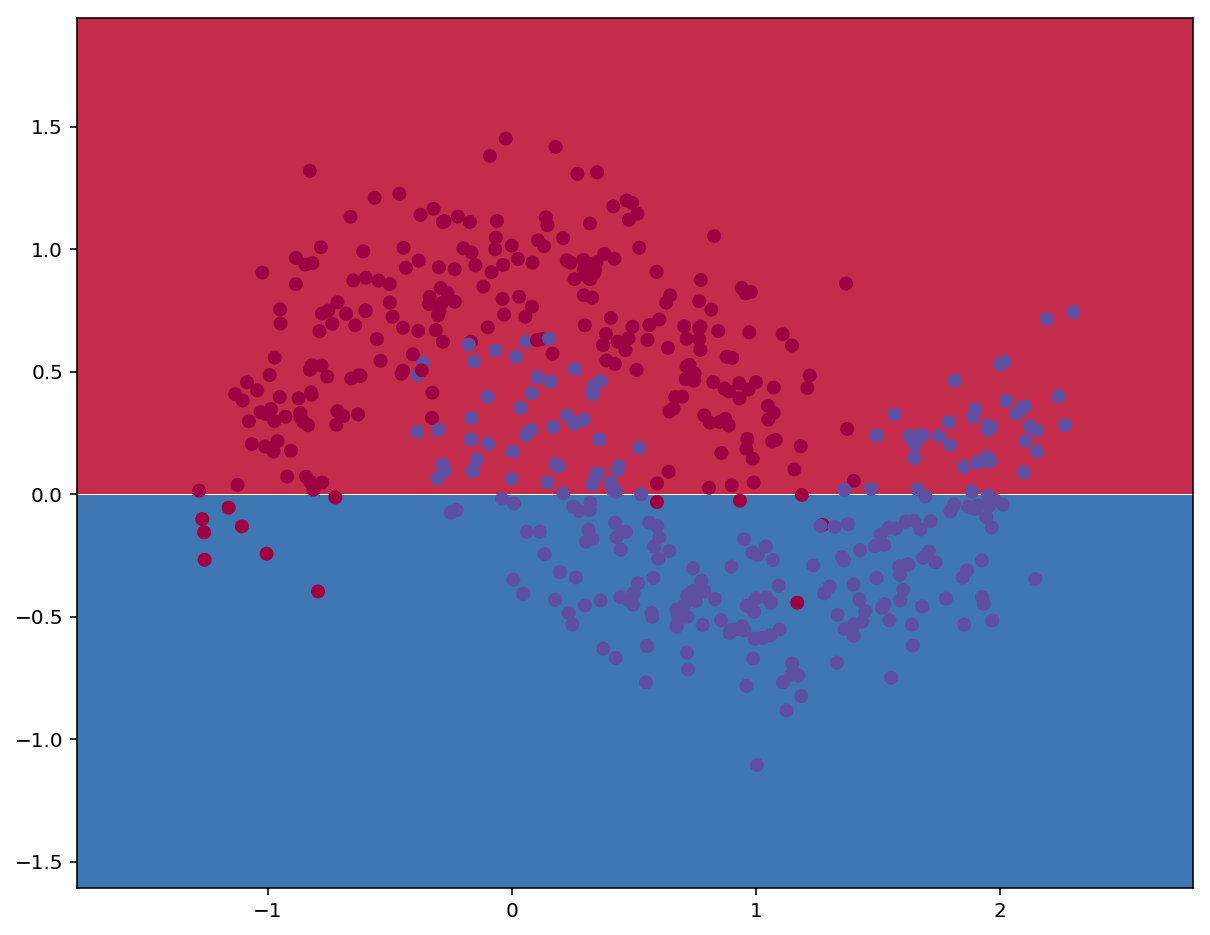

In [5]:
# Here we show how a boundary can be defined and plotted

# First a simple function of X to illustrate the mechanism. 
# In this example we define a prediction that all points above 0 on the vertical axis belong to category 0
def simplePred(x):
    return np.where(x[:,1]>0., 0, 1)

plot_decision_boundary(simplePred)

# Calculate the accuracy of this predition
print("Accuracy=",accuracy(simplePred))


Accuracy 0.786


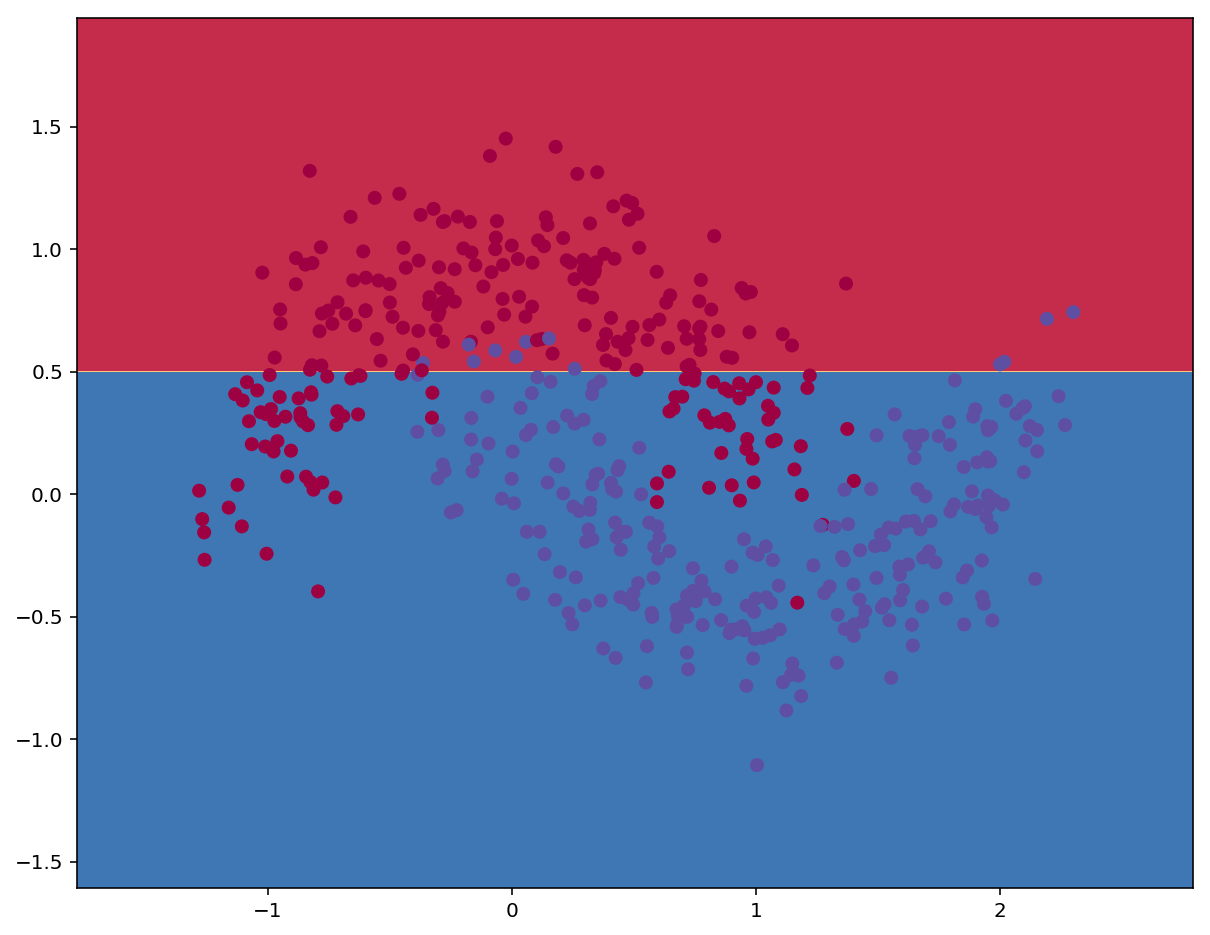

In [6]:
# The example above is impractical, as if we want to use a different classification 
# (eg points above 0.5 are assigned to category 0) we need to write a new function.

# A simple way to separate the two categories
def predConst(x,C):
    return np.where(x[:,1]>C, 0, 1)

# Use lambda to turn the function into a function of just x
plot_decision_boundary(lambda x: predConst(x,0.5))
print("Accuracy",accuracy(lambda x: predConst(x,0.5)) )


### Exercise 1. Optimise the constant prediction
Loop over a value of C in the range (-1:1) in steps of 0.01 and find the value with the highest accuracy. Plot the decision boundary for this value

In [7]:
# Your code goes here:

max_ = 0
for i in np.arange (-1, 1, 0.01):
    accval = accuracy(lambda x: predConst(x,i))
    if accval > max_:
        max_ = accval
        maxC = i


print("max acuuracy: ", max_)
print("produced by C val: ", maxC)

max acuuracy:  0.848
produced by C val:  0.28000000000000114


### Exercise 2: Train a linear model
Write a predLinear function that takes two arguments and separates the plane usign a straight line (a*x+b). The points above corresponds to category 0 and those below to category 1

Scan the parameters a and b and find the values that yield the highest accuracy. Print the values of a and b and plot the boundary graph. 

In [8]:
# Function to define a linear model
def predLinear(x,a,b):
    return np.where(x[:,1]> (a * x[:,0] + b), 0, 1)

max_ = 0
for a in np.arange (-1, 1, 0.01):
    for b in np.arange (-1, 1, 0.01):
        accval = accuracy(lambda x: predLinear(x,a,b))
        if accval > max_:
            max_ = accval
            maxa, maxb = a, b

print("max accuracy: ", max_)
print("Produced by a val: ", maxa)
print("and b val: ", maxb)

max accuracy:  0.876
Produced by a val:  0.27000000000000113
and b val:  0.010000000000000897


## Train a neural network
The boundary between the red and blue areas can be identified using a neural network, as discussed in the lecture earlier. The following helper functions lay out the calculation needed to evaluate the loss function, its derivatives and to find the parameters of the network. 

In [9]:
# These are parameter that are used in the training
# 
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [10]:
# Calculate the value of the output layers a2
def calcProbsNN(model,x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    # This is the softmax function
    exp_scores = np.exp(z2)
    # This is a2=yhat, eg the values of the output layer
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    
    return probs
    
# Helper function to predict an output (0 or 1)
def predict(model, x):
    probs = calcProbsNN(model,x)   
    return np.argmax(probs, axis=1)

In [11]:
# Helper function to evaluate the total loss on the dataset
# See notes from this morning lecture
#
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    probs = calcProbsNN(model,X)   
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [12]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}


    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

### Model building
This example code uses the helpers above to run a neural network with 3 hidden layers and lots the decision boundary and the accuracy

Loss after iteration 0: 0.358460


Accuracy 0.964


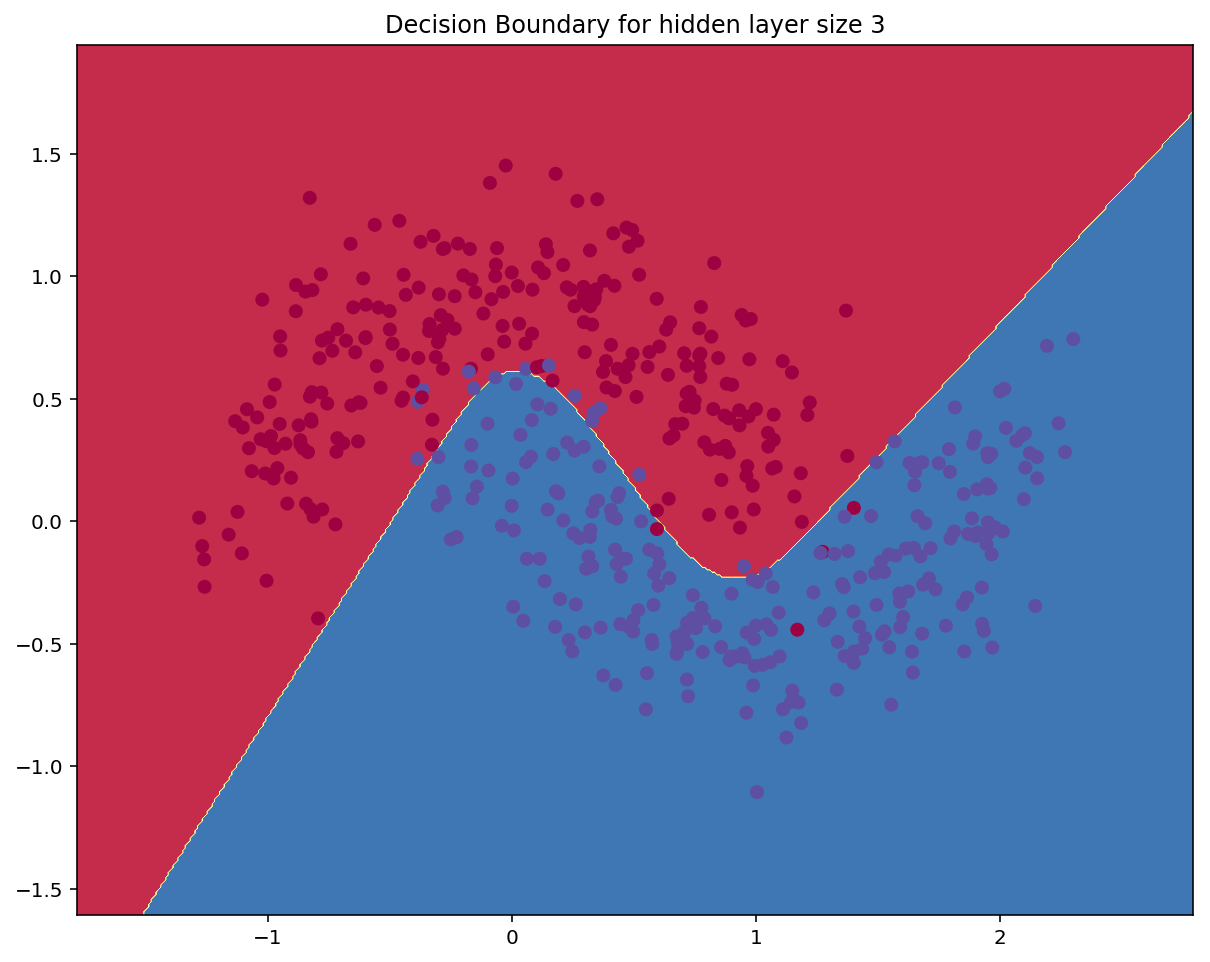

In [13]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True,num_passes=500)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
print("Accuracy",accuracy(lambda x: predict(model,x)) )


Accuracy 0.858


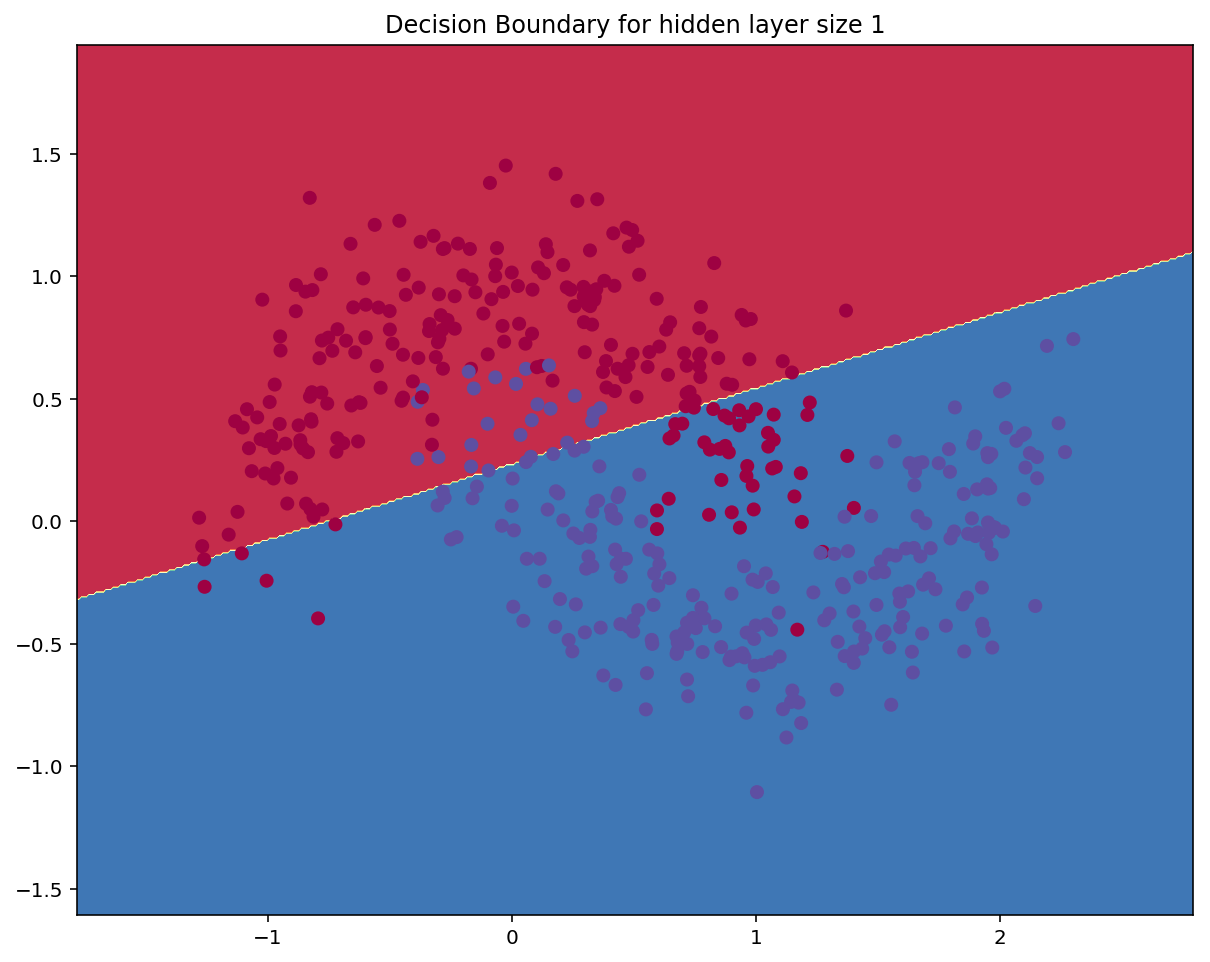

Accuracy 0.848


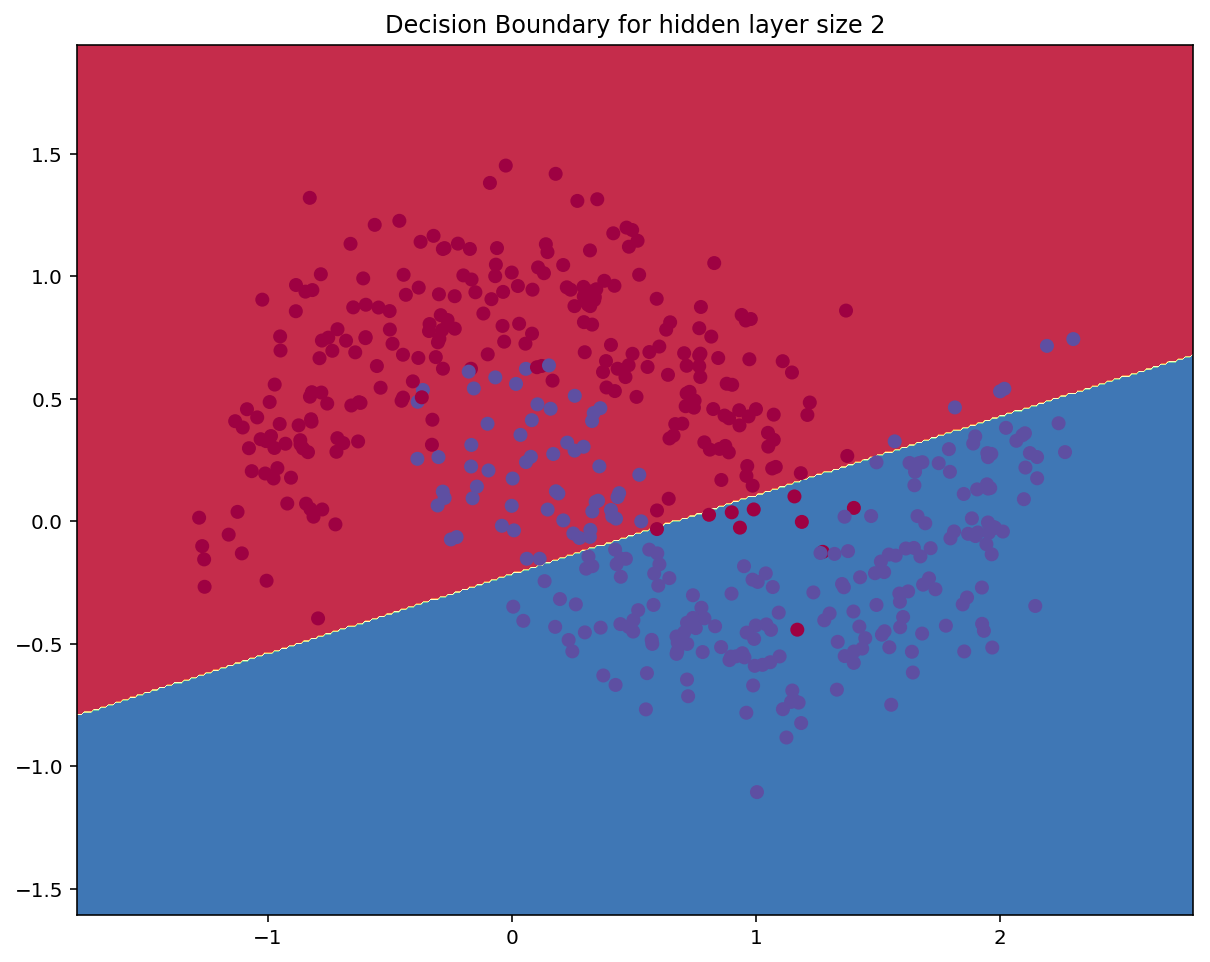

Accuracy 0.964


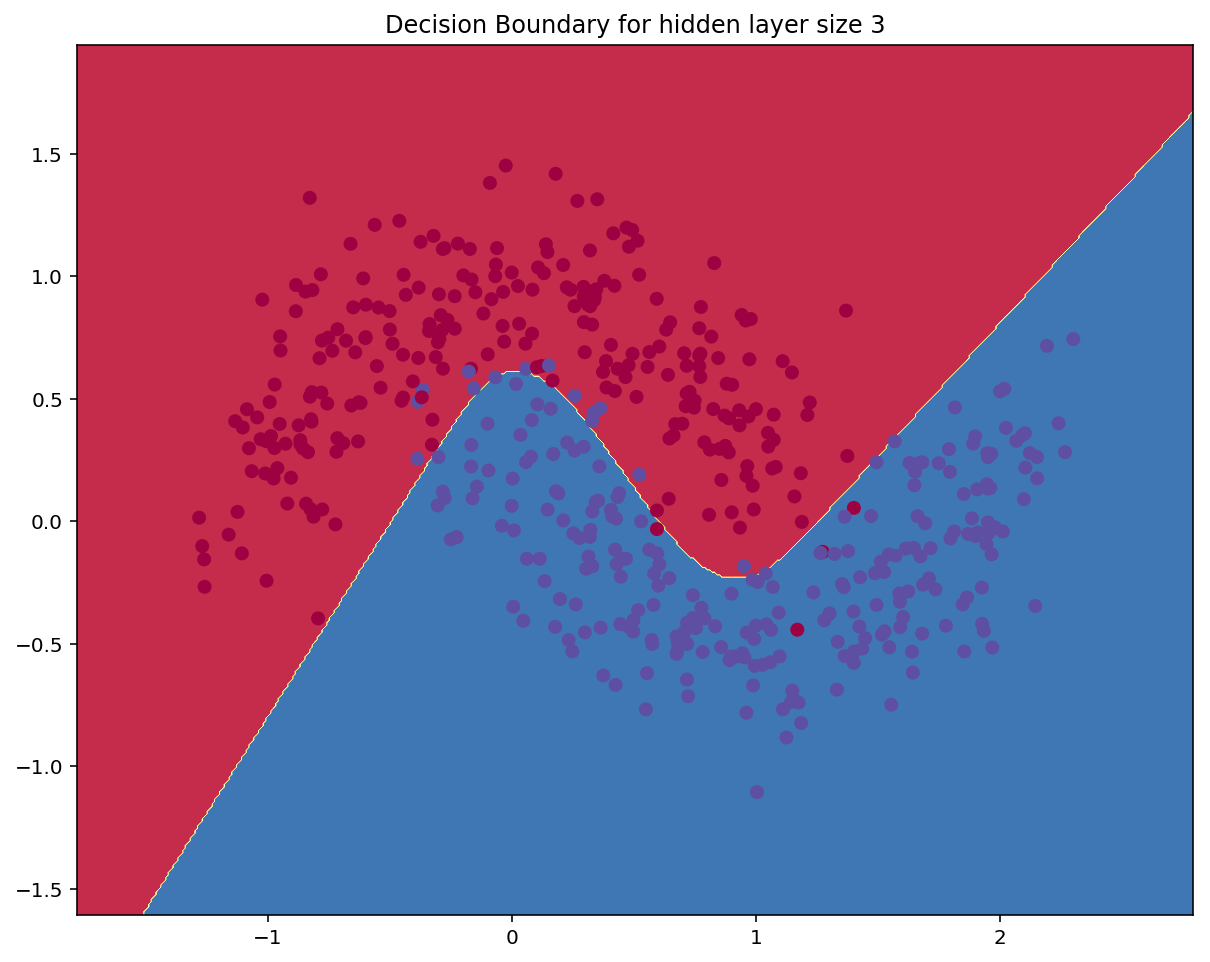

Accuracy 0.964


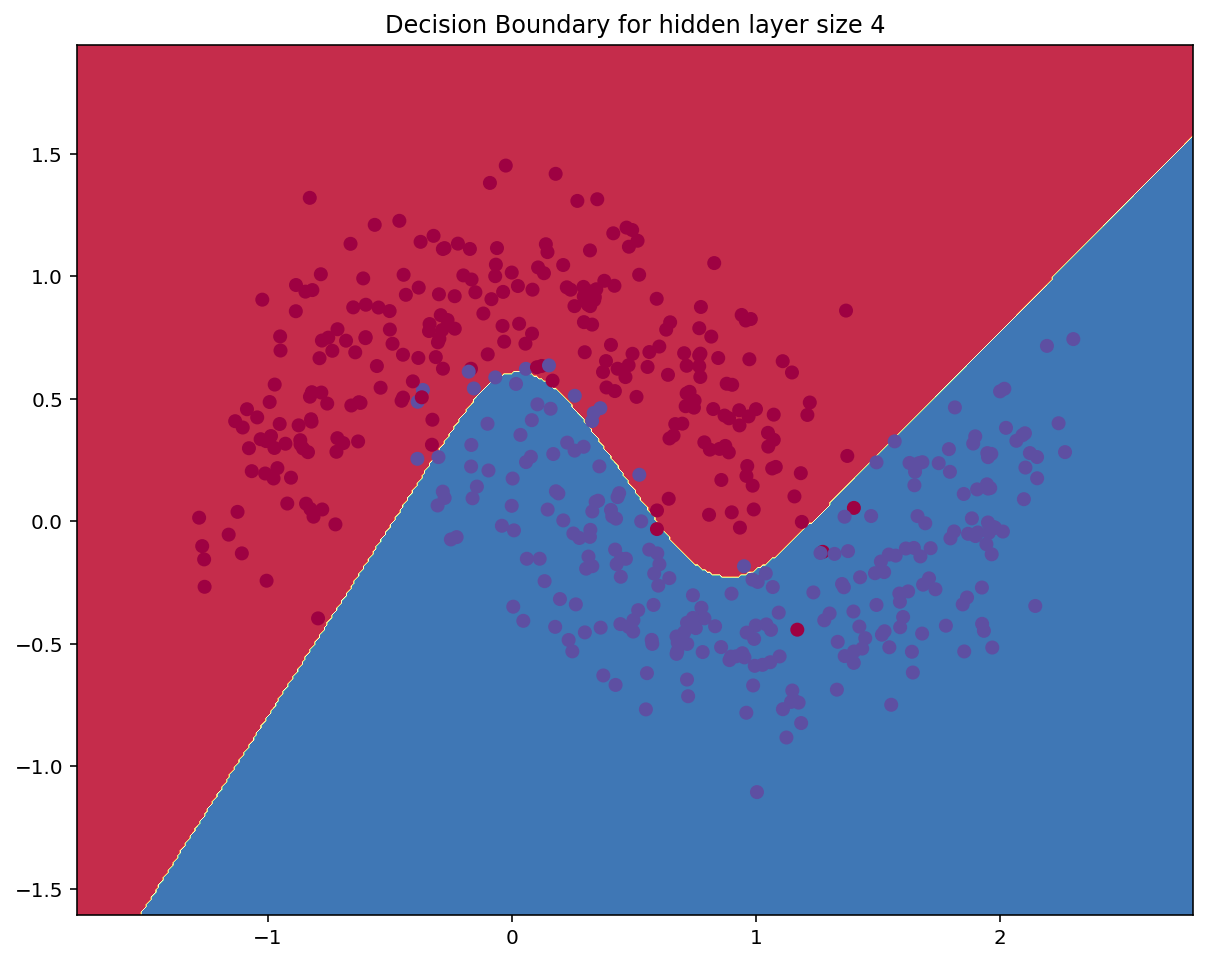

Accuracy 0.97


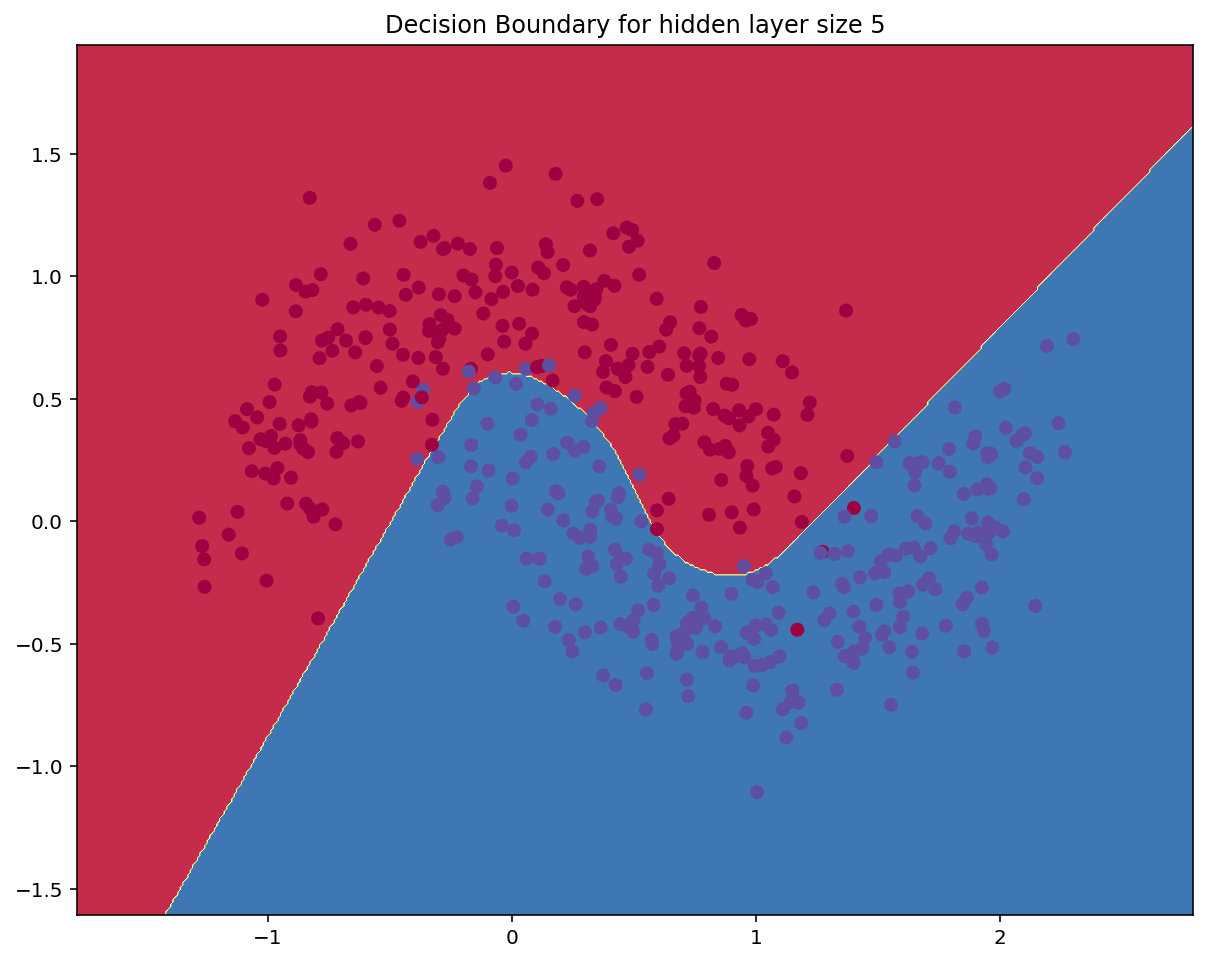

Accuracy 0.976


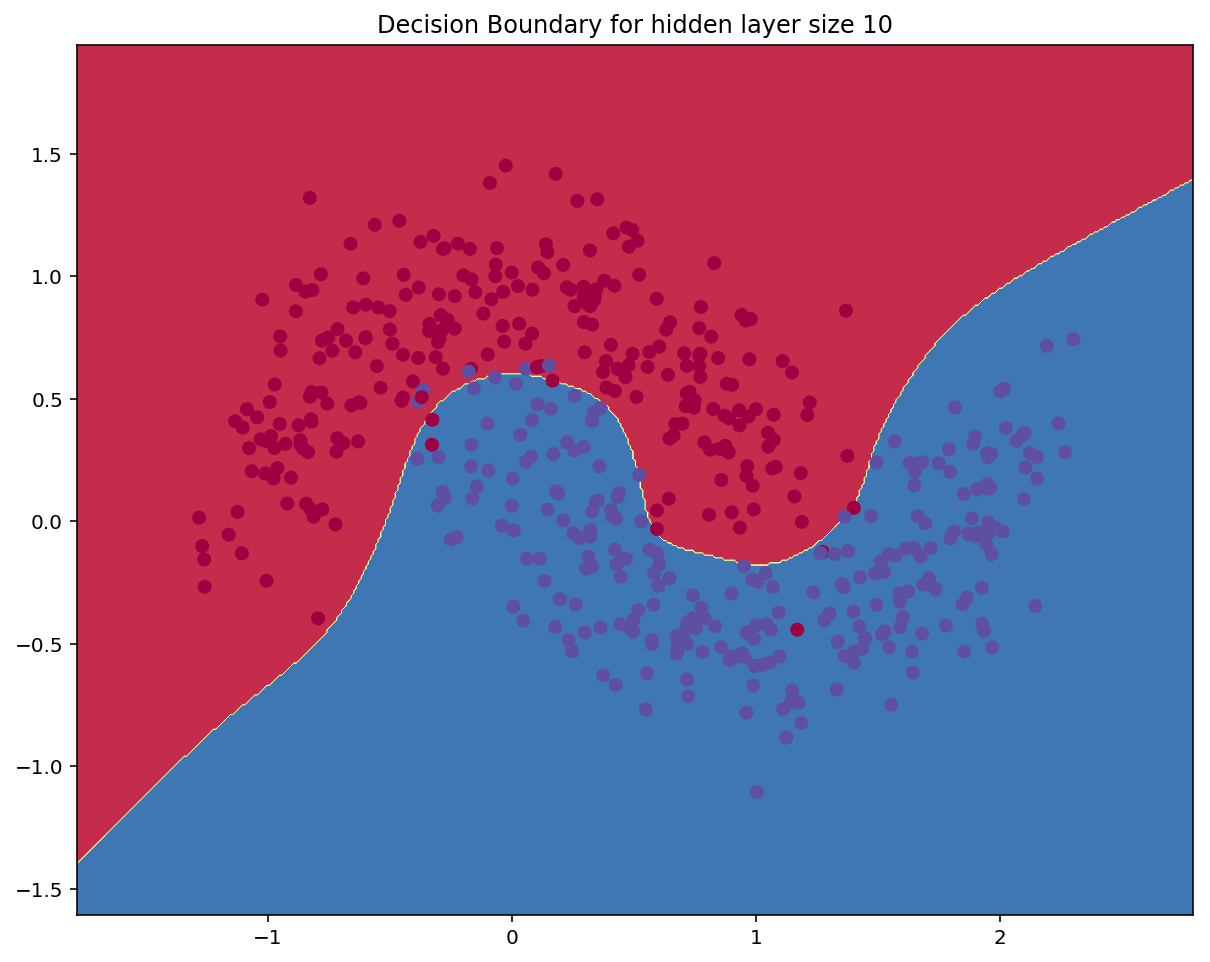

Accuracy 0.976


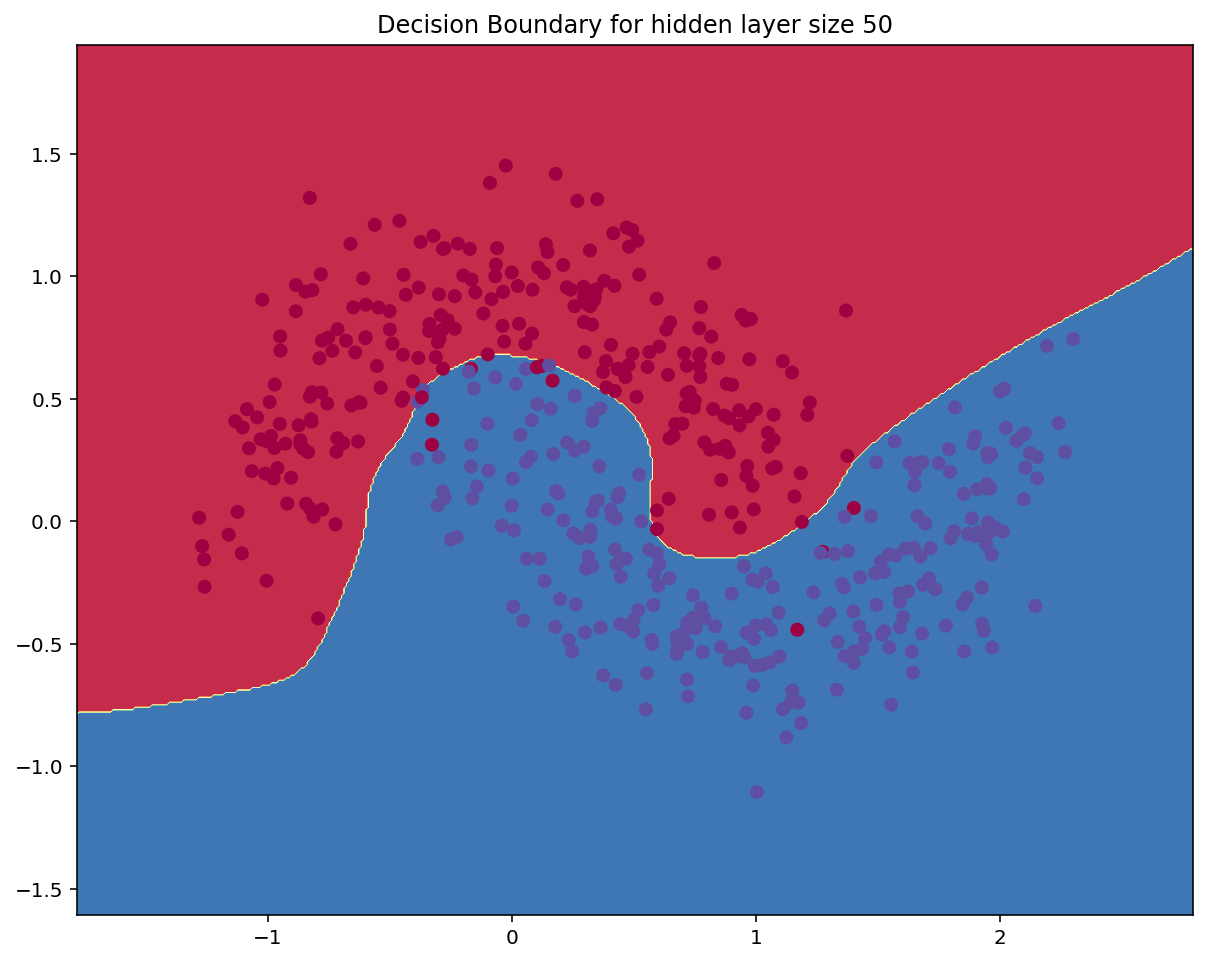

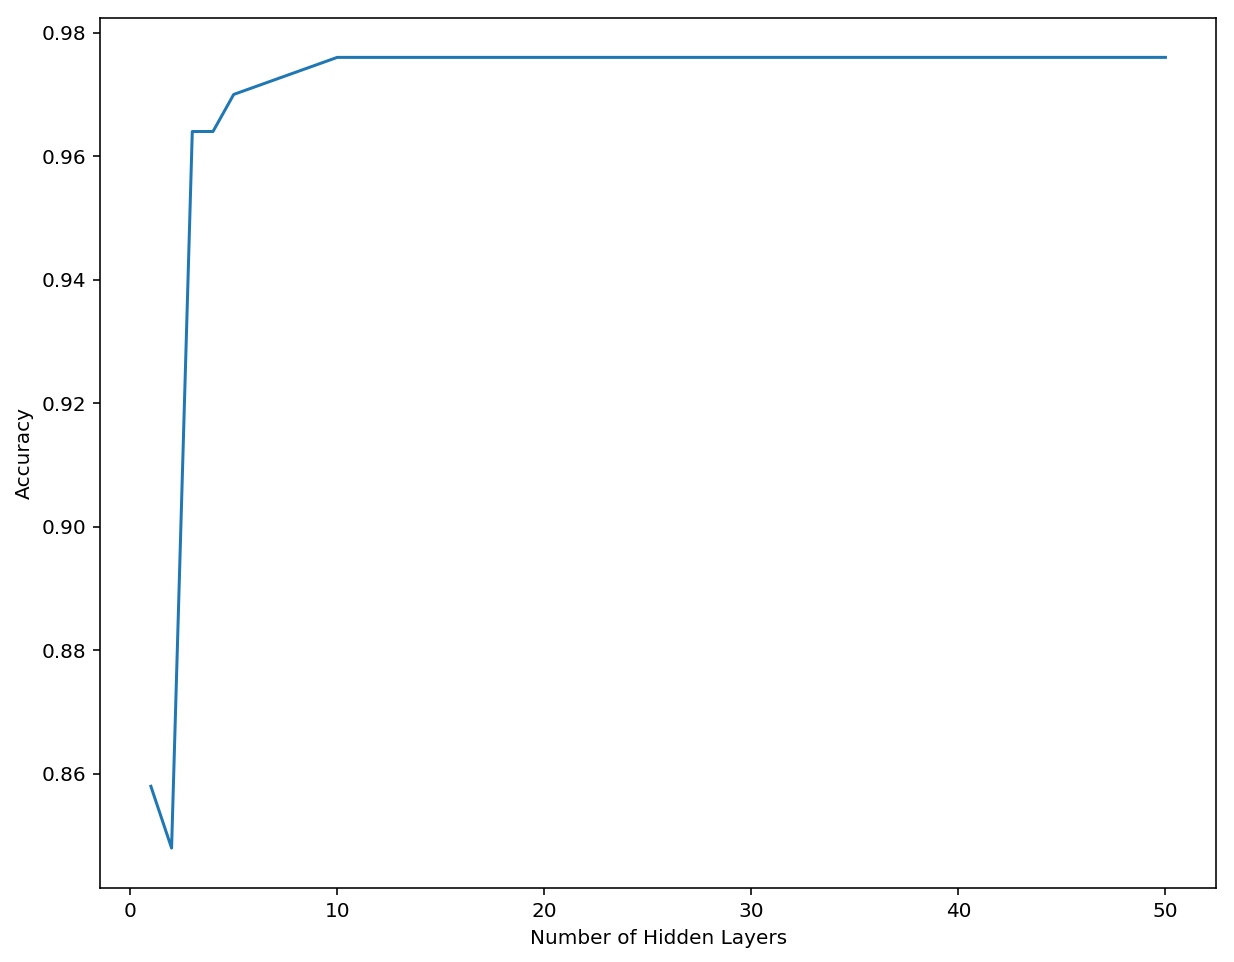

()

In [14]:
# Ex 3
def GeneralListPlot(XList, YList, xlabel, ylabel):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.plot(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()
# Without a function: (Because at this point I have no idea which is preffered)
"""
model1 = build_model(1, print_loss=True,num_passes=500)
model2 = build_model(2, print_loss=True,num_passes=500)
model3 = build_model(3, print_loss=True,num_passes=500)
model4 = build_model(4, print_loss=True,num_passes=500)
model5 = build_model(5, print_loss=True,num_passes=500)
model10 = build_model(10, print_loss=True,num_passes=500)
model50 = build_model(50, print_loss=True,num_passes=500)

plot_decision_boundary(lambda x: predict(model1, x))
plt.title("Decision Boundary for hidden layer size 1")
print("Accuracy",accuracy(lambda x: predict(model1,x)) )
plt.show()

plot_decision_boundary(lambda x: predict(model2, x))
plt.title("Decision Boundary for hidden layer size 2")
print("Accuracy",accuracy(lambda x: predict(model2,x)) )
plt.show()

plot_decision_boundary(lambda x: predict(model3, x))
plt.title("Decision Boundary for hidden layer size 3")
print("Accuracy",accuracy(lambda x: predict(model3,x)) )
plt.show()

plot_decision_boundary(lambda x: predict(model4, x))
plt.title("Decision Boundary for hidden layer size 4")
print("Accuracy",accuracy(lambda x: predict(model4,x)) )
plt.show()

plot_decision_boundary(lambda x: predict(model5, x))
plt.title("Decision Boundary for hidden layer size 5")
print("Accuracy",accuracy(lambda x: predict(model5,x)) )
plt.show()

plot_decision_boundary(lambda x: predict(model10, x))
plt.title("Decision Boundary for hidden layer size 10")
print("Accuracy",accuracy(lambda x: predict(model10,x)) )
plt.show()

plot_decision_boundary(lambda x: predict(model50, x))
plt.title("Decision Boundary for hidden layer size 50")
print("Accuracy",accuracy(lambda x: predict(model50,x)) )
plt.show()
"""

# With a loop/Function
def DecBound (nlayer, passcnt):
    """Plots the prediction model for a NN of 'nlayer' hidden layers with 'passcnt' passes, and returns the accuracy"""
    model = build_model(nlayer, print_loss=False,num_passes=passcnt)
    plot_decision_boundary(lambda x: predict(model, x))
    plt.title("Decision Boundary for hidden layer size {}".format(nlayer) )
    print("Accuracy",accuracy(lambda x: predict(model,x)) )
    plt.show()
    return(accuracy1(lambda x: predict(model,x), X, y), model)

nlist = [1, 2, 3, 4, 5, 10, 50]
acclist = []
modellist = []
for i in nlist:
    A, B = DecBound(i, 500) # These don't need sensible names, as they are just to transfer directly to the list
    acclist.append(A)
    modellist.append(B)

# I don't know how to make a table, so...
GeneralListPlot(nlist, acclist, "Number of Hidden Layers", "Accuracy")

In [15]:
#Ex 4

Matrices = build_model(4, print_loss=False,num_passes=500)

print("W1: ", Matrices['W1'], "\n")
print("W2: ", Matrices['W2'], "\n")
print("b1: ", Matrices['b1'], "\n")
print("b2: ", Matrices['b2'], "\n")

W1:  [[ 0.15445315  3.87927226 -4.91461429  3.95126325]
 [-0.69281964 -3.8358095  -3.43139998 -2.54825815]] 

W2:  [[-0.23977797  0.38597189]
 [-2.05025284  2.81043406]
 [-2.66262838  3.0824585 ]
 [-2.53486147  2.90466885]] 

b1:  [[-3.85511984 -4.63736833  2.86082529  1.82894707]] 

b2:  [[-0.08552787  0.08552787]] 



Accuracy for model with 1 hidden layers 0.871
Accuracy for model with 2 hidden layers 0.836
Accuracy for model with 3 hidden layers 0.96
Accuracy for model with 4 hidden layers 0.959
Accuracy for model with 5 hidden layers 0.959
Accuracy for model with 10 hidden layers 0.96
Accuracy for model with 50 hidden layers 0.95


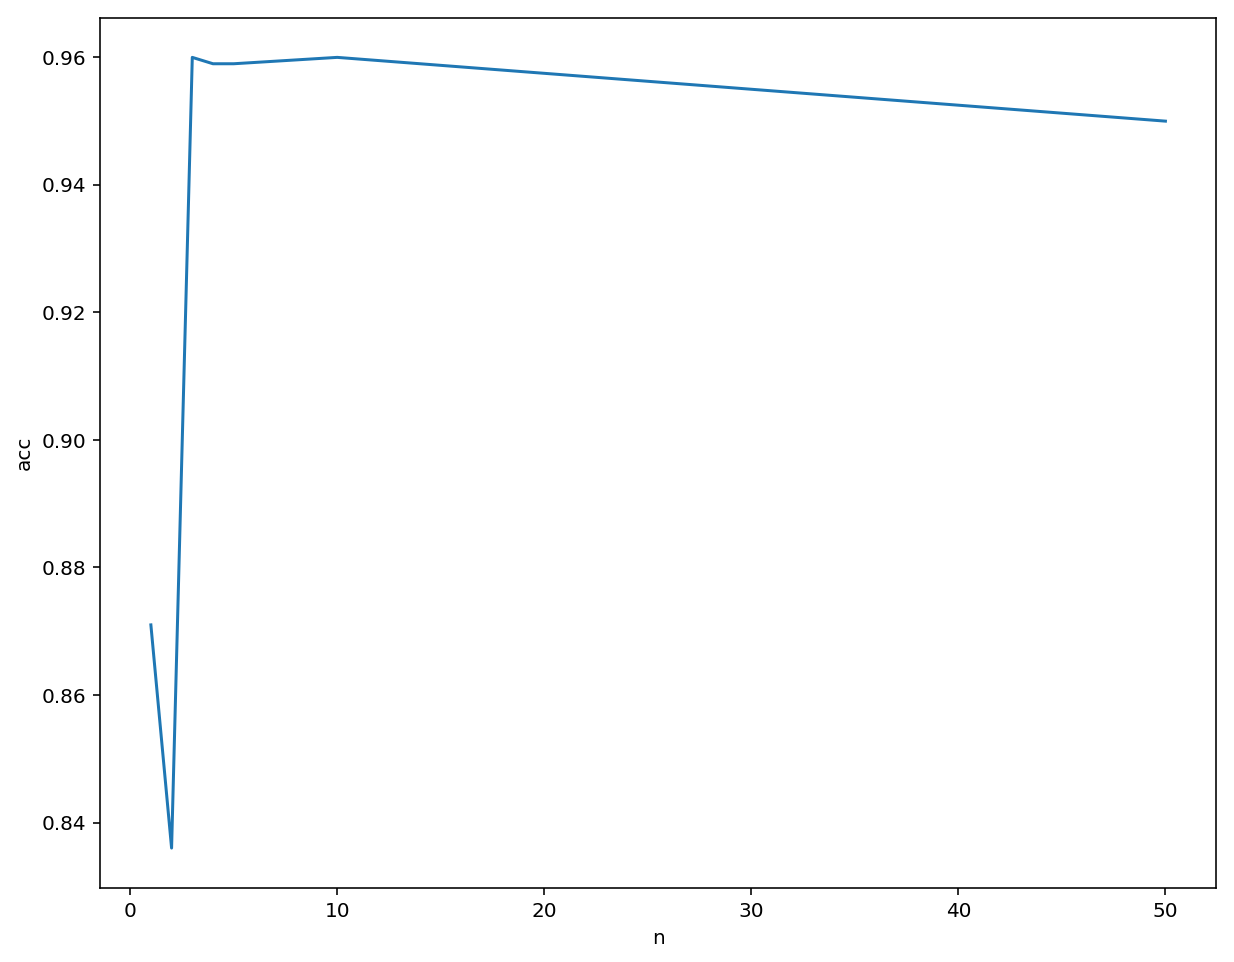

Perfect Sqrt


In [16]:
# Ex 5 - I feel like some actual lessons on how to do this would have been useful. I get marked down for my comments, but the ones in the given code are useless.
#
# def AccTest (model, inputdataX, inputdatay):
#     acclist = []
#     for i in range(1, 100, 1):
#         acclist.append(accuracy(lambda x: predict(model,x)))


X_test, y_test = generate_data(1000,rndm=903,noise=0.20)

acclist = []
for i in range (len(modellist)):
    print("Accuracy for model with {} hidden layers".format(nlist[i]),accuracy1(lambda x: predict(modellist[i], x), X_test, y_test))
    acclist.append(accuracy1(lambda x: predict(modellist[i], x), X_test, y_test))

GeneralListPlot(nlist, acclist, "n", "acc")
print("Perfect Sqrt")

Accuracy for model with 1 hidden layers 0.8654999999999999
Accuracy for model with 2 hidden layers 0.8475
Accuracy for model with 3 hidden layers 0.968
Accuracy for model with 4 hidden layers 0.964
Accuracy for model with 5 hidden layers 0.964
Accuracy for model with 10 hidden layers 0.9715
Accuracy for model with 50 hidden layers 0.9605


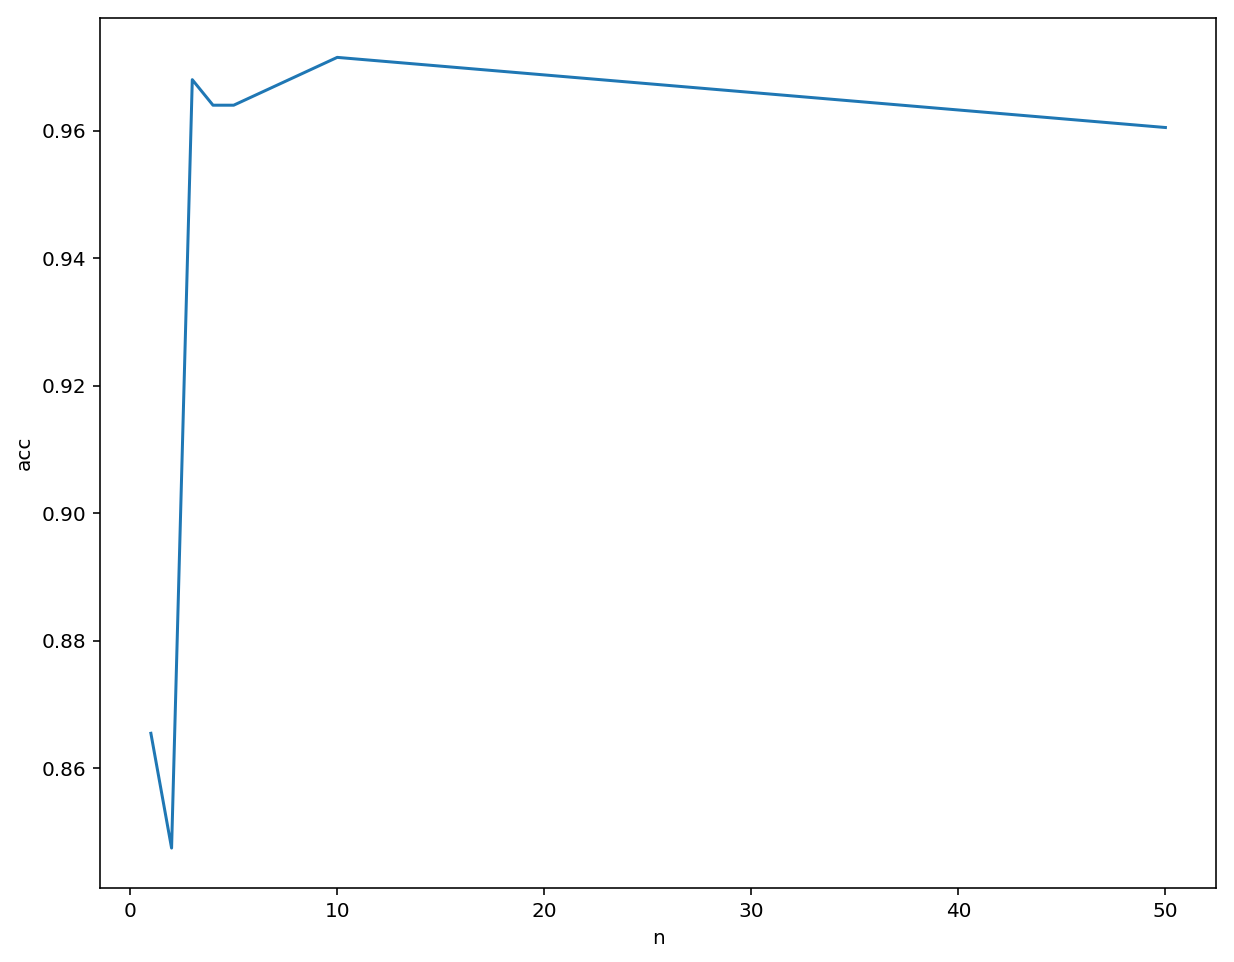

()

In [17]:
#Ex 6

X_test1, y_test1 = generate_data(2000,rndm=903,noise=0.20)

acclist = []
for i in range (len(modellist)):
    print("Accuracy for model with {} hidden layers".format(nlist[i]),accuracy1(lambda x: predict(modellist[i], x), X_test1, y_test1))
    acclist.append(accuracy1(lambda x: predict(modellist[i], x), X_test1, y_test1))

GeneralListPlot(nlist, acclist, "n", "acc")

In [18]:
# Ex 7

# Given that the y variable signifies the grouping, allowing y to be more than just 0 & 1 allows for more groups. There's probably a pred_func equivalent for that. Would also need extra Ws & bs
#
# Honestly, the whole code needs rewriting from scratch to make it work in a more general case. This is code written for a specific case and is not general enough
#

### Exercise 3
Use the code above to plot the boundaries for different sizes of the hidden layer (1, 2, 3, 4, 5, 10, 50). Evaluate the accuracy for each of the cases and report that as a table or as a graph

### Exercise 4
For the case with a hidden layer of dimension 4, print the matrices $W_1$, $W_2$ and the bias vectors $b_1$ and $b_2$ that are obtained at the end of the training. Comment on their dimensionality. 

### Exercise 5
Generate a "test data set" with 1000 points, which is statistically independent from the training set by using a different random seed. Evaluate the accuracy as a function of the hidden layer dimension on this test data set. **Note* the test data set should not be used for training

### Exercise 6
Repeat the exercises above using a larger training set of 2000 events. In particular evaluate the efficiency using the test set defined in exercise 5

### Exercise 7
How would you modify the code to classify elements with 3 or more categories? How would you modify the code to allow for more input parameters? Please provide a written description with code examples, but a full working code is not needed. The purpose of this exercise is for you to reflect on how to implement a more generic ANN, which we will use later in the course. 

### For PHY428. 
   * Generate test sets with different value of noise (0.4 and 0.6) and evaluate the efficiency using the model trained in exercise 5
   * Optimise the minimisation of the loss function. Plot the value of the loss function vs the loop number and find a way to optimise the number of loops by stopping when a given a 

